# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es categórica, asi que no habrá que reescalar con funciones como el logaritmo


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA
import plotly as plty

In [2]:
sns.set_style("darkgrid")

### Leer conjunto de datos y primer vistazo

In [3]:
data=pd.read_csv("mushrooms.csv")
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploración de datos 

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
# Información sobre el tipo de datos de cada feature
data.dtypes


class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#### Calcular el número de nulos de cada feature

In [6]:
# igual que otras veces, una linea, contar los nulos por variable
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Buscar valores extraños. Para ello, ver los valores distintos en cada feature

> A continuación, buscáremos todos los valores posibles del DataFrame y luego contaremos cuántos de ellos hay en cada *feature*:

In [7]:
ndf = data.apply(pd.Series.value_counts).fillna(0)

In [8]:
ndf

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
a,0.0,0.0,0.0,0.0,0.0,400.0,210.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,384.0,0.0
b,0.0,452.0,0.0,168.0,0.0,0.0,0.0,0.0,5612.0,1728.0,...,0.0,432.0,432.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0
c,0.0,4.0,0.0,44.0,0.0,192.0,0.0,6812.0,0.0,0.0,...,0.0,36.0,36.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0
d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3148.0
e,4208.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,0.0,96.0,...,0.0,96.0,96.0,0.0,0.0,0.0,2776.0,0.0,0.0,0.0
f,0.0,3152.0,2320.0,0.0,4748.0,2160.0,7914.0,0.0,0.0,0.0,...,600.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0
g,0.0,0.0,4.0,1840.0,0.0,0.0,0.0,0.0,0.0,752.0,...,0.0,576.0,576.0,0.0,0.0,0.0,0.0,0.0,0.0,2148.0
h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,732.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1632.0,0.0,0.0
k,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,408.0,...,2304.0,0.0,0.0,0.0,0.0,0.0,0.0,1872.0,0.0,0.0


> Como podemos ver todos los valores son letras excepto la interrogación (?) por lo que debemos pensar si imputarlo 

#### Tratar aquellos valores que entendamos que sean nulos


> Tras haber probado distintas maneras: eliminar '?', dejar '?' y reemplazar '?' por la moda, finalmente hemos elegido la tercera forma ya que da mejores resultados. Esto es, los clusters estaban más separados y menos mezclados y la accuracy era mejor.

In [9]:
data= data.replace('?', data['stalk-root'].mode()[0])

data['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [10]:
data.count()

class                       8124
cap-shape                   8124
cap-surface                 8124
cap-color                   8124
bruises                     8124
odor                        8124
gill-attachment             8124
gill-spacing                8124
gill-size                   8124
gill-color                  8124
stalk-shape                 8124
stalk-root                  8124
stalk-surface-above-ring    8124
stalk-surface-below-ring    8124
stalk-color-above-ring      8124
stalk-color-below-ring      8124
veil-type                   8124
veil-color                  8124
ring-number                 8124
ring-type                   8124
spore-print-color           8124
population                  8124
habitat                     8124
dtype: int64

> Para averiguar si todas las features aportan información podemos, por ejemplo, crear un *heatmap*. Para ello, primero debemos pasar las variables de **object** a **categorical** ya que, de otro modo, no se podría encontrar correlación entre features

In [11]:
new=data.copy() #Creamos una copia del DataFrame original para no alterarlo

for i in new.columns:
    new[i]=new[i].astype('category').cat.codes

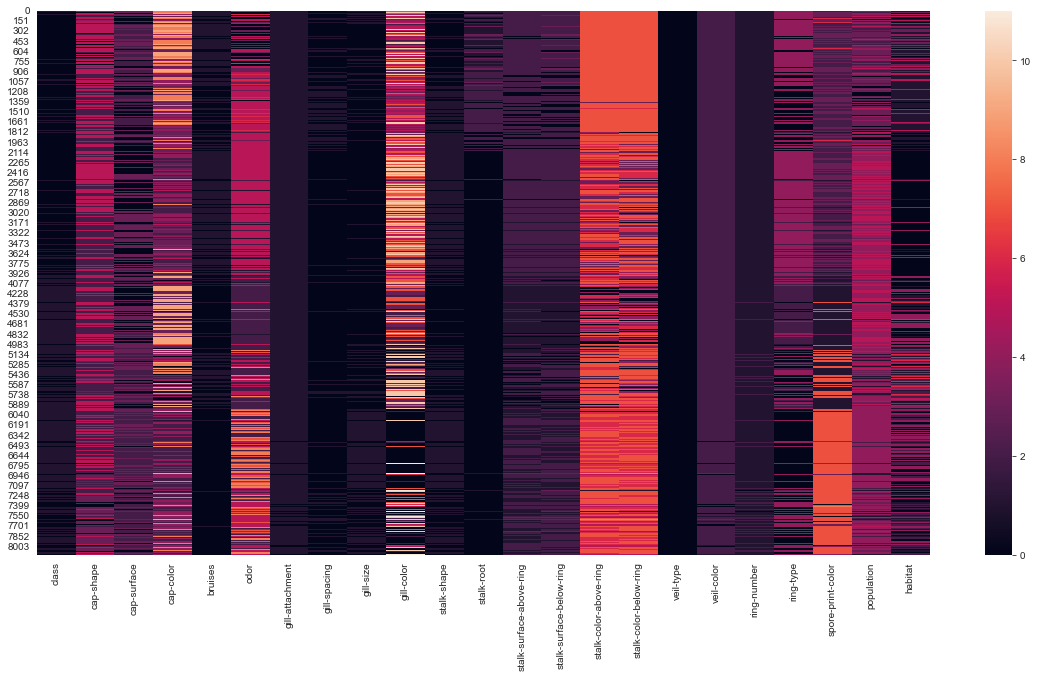

In [12]:
plt.figure(figsize=(20,10))

sns.heatmap(new)
plt.show()

> Vemos que en el caso de *veil-type* toda la columna aparece con correlación 0 o muy cercana a 0 por lo que la eliminamos.

In [13]:
#Eliminamos las variables que no aportan información

columnas_eliminar=["veil-type"]
data.drop(columns=columnas_eliminar,inplace=True)

#### Separar entre variables predictoras y variables a predecir

In [14]:
# la variable que trata de predecir este conjunto de datos es class
y = data["class"]
X = data.drop(columns=['class'])

#### Codificar correctamente las variables categóricas a numéricas

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

> Aunque se podría hacer de forma más sencilla con la función **get_dummies**, nos piden específicamente usar **OneHotEncoder**:

In [16]:
# One hot, es una linea

encoder = OneHotEncoder(handle_unknown='ignore')
X = pd.DataFrame(encoder.fit_transform(X).toarray())


In [17]:
le = LabelEncoder()
y = le.fit_transform(y)

#### Train test split, duh ;)

In [18]:
# os lo dejamos a todos igual :)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no hay dibujitos) así que vamos a hacer algunos. Tenemos el problema de que son muchas variables... Bueno, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)

X_pca=pca.fit_transform(X_train)


In [20]:
PC_data= pd.DataFrame(data= X_pca, columns=['PC1','PC2','PC3'])
PC_data['Class']= y_train
PC_data.head()


,PC1,PC2,PC3,Class
0,-1.304401,0.142821,-1.680673,0
1,-0.471210,-0.078103,0.445016,1
2,-1.601066,0.080856,-1.207469,0
3,-1.115248,-0.666403,2.062116,0
4,1.405287,-1.862369,0.221149,1


> Donde en Class 0 = p y 1 = e

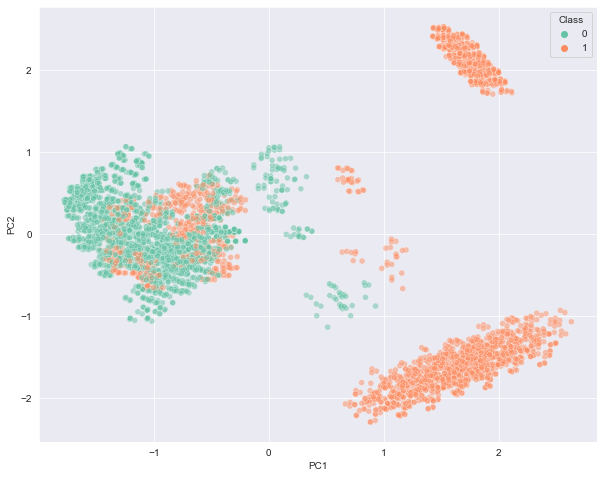

In [21]:
# representar en un scatterplot y poner en color las etiquetas de entrenamiento

plt.figure(figsize=(10,8))
sns.scatterplot(data= PC_data, x="PC1", y="PC2", hue="Class",alpha=0.5,palette='Set2')
plt.show()

> Y en 3D:

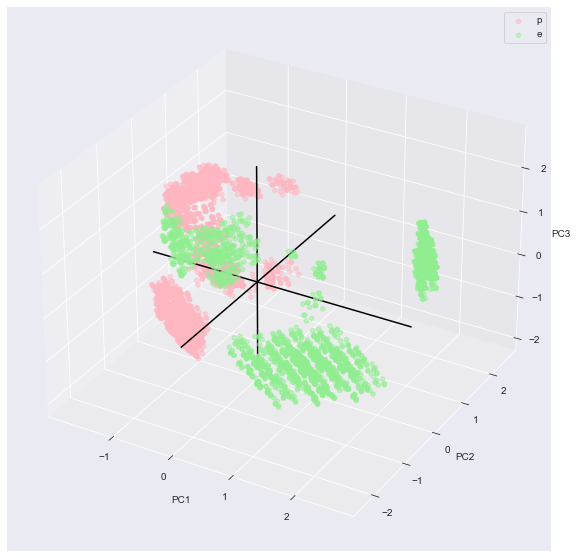

In [45]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(PC_data['PC1'][PC_data['Class']==0],PC_data['PC2'][PC_data['Class']==0],PC_data['PC3'][PC_data['Class']==0],label='p',c='lightpink',alpha=0.5)
ax.scatter(PC_data['PC1'][PC_data['Class']==1],PC_data['PC2'][PC_data['Class']==1],PC_data['PC3'][PC_data['Class']==1],label='e',c='lightgreen',alpha=0.5)

xAxisLine = ((min(PC_data['PC1']), max(PC_data['PC2'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'k')
yAxisLine = ((0, 0), (min(PC_data['PC2']), max(PC_data['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'k')
zAxisLine = ((0, 0), (0,0), (min(PC_data['PC3']), max(PC_data['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'k')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, y para evitar casos como el de la calidad del vino ;), vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  silhouette_score

In [24]:
# Definir el clasificador y el número de estimadores

rf_params = {'n_estimators' :[100, 200, 500, 1000],
             'max_depth': [5, 8, 10,20]}
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), 
                     rf_params,
                     cv=3).fit(X_train, y_train)

In [25]:
rf_gs.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [26]:
rf_tuned = RandomForestClassifier(**rf_gs.best_params_, random_state=42)
rf_tuned.fit(X_train, y_train)

print(f'Test accuracy - {round(rf_tuned.score(X_test, y_test) * 100, 2)}%')

Test accuracy - 100.0%


Oh sh*t, resulta que lo clava!! Vuelve arriba, revisa que hayas partido bien la variable predictora, corre!

Naaaah que es broma, está bien, es un conjunto sencillete y Random Forest es muy bueno en su trabajo xD Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [27]:
X_train.shape

(5443, 115)

Ufffffff ¿Muchas features no? Vamos a reducir a ver qué tal.¿Cómo? Venga, mira como se llama la sección, seguro que te da una pista ;)

> El siguiente código calcula el PCA sin reducir la dimensionalidad y, a continuación, calcula el número mínimo de dimensiones necesario para conservar el 90% de la varianza del conjunto de entrenamiento:
    

In [28]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)  #Devuelve la suma acumulada de los elementos.
d = np.argmax(cumsum >= 0.90) + 1    #Devuelve los índices de los valores máximos 

In [29]:
d

31

> Seguidamente se representa una gráfica de la aportación de los features del PCA a la varianza total

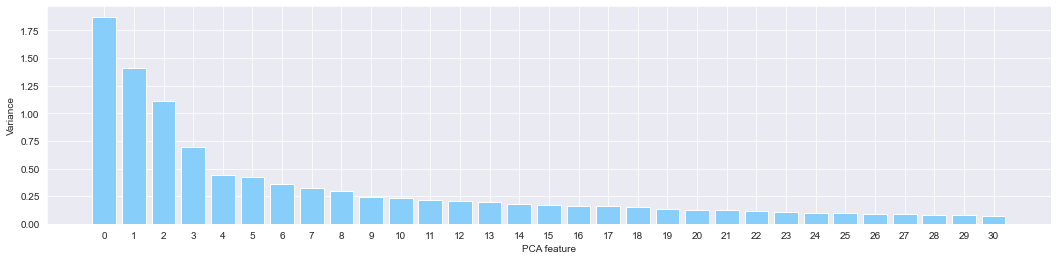

In [30]:
pca = PCA(random_state=42)
pca.fit(X_train)
features = range(pca.n_components_)

plt.figure(figsize=(18,4))
plt.bar(features[:31], pca.explained_variance_[:31], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:31])
plt.show()

> Calculamos de nuevo el PCA con el número de dimensiones "d" hallado anteriormente.

In [31]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_test_pca= pca.transform(X_test)  

In [32]:
#Buscamos los mejores hiperparametros para X_reduced

rf_params = {'n_estimators' :[100, 200, 500, 1000],
             'max_depth': [5, 8, 10,20]}
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), 
                     rf_params,
                     cv=3).fit(X_reduced, y_train)


In [33]:
# Entrenar Random Forest

# 1- Definir el RF
rf_tuned= RandomForestClassifier(**rf_gs.best_params_, random_state=42) 

# 2- Entrenar clasificador
rf_tuned.fit(X_reduced, y_train)

y_pred= rf_tuned.predict(X_test_pca)

In [34]:
accuracy_score(y_test, y_pred)

0.999627004848937

> Awesome!!

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais




> Ahora, vamos a hacer una primera estimación del *k* adecuado usando la métrica **inertia**. Esta es la suma de las distancias al cuadrado de las muestras al centro del cluster más cercano, ponderada por los pesos de la muestra si se proporcionan.

In [35]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

ks = range(1, 16)

inertias = []


for k in ks:
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)
   
    
    

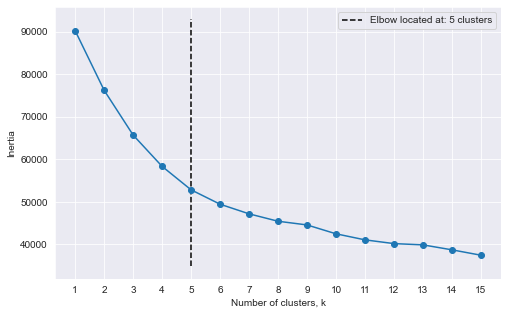

In [36]:
kn = KneeLocator(ks, inertias, curve='convex', direction='decreasing')


plt.figure(figsize=(8,5))

plt.plot(ks, inertias, '-o')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed',color='k',label=f'Elbow located at: {kn.knee} clusters')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.legend()
plt.show()

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``factorplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans

> El valor localizado en el *elbow* de la curva es k=5. Por lo que lo escogemos para entrenar el k-means deifinitivo.

In [37]:
PCA_components = pd.DataFrame(X)

In [38]:

kmeans = KMeans(n_clusters=5,random_state=42)# Definir y entrenar Kmeans
kmeans.fit(X)
y_pred= kmeans.predict(X)


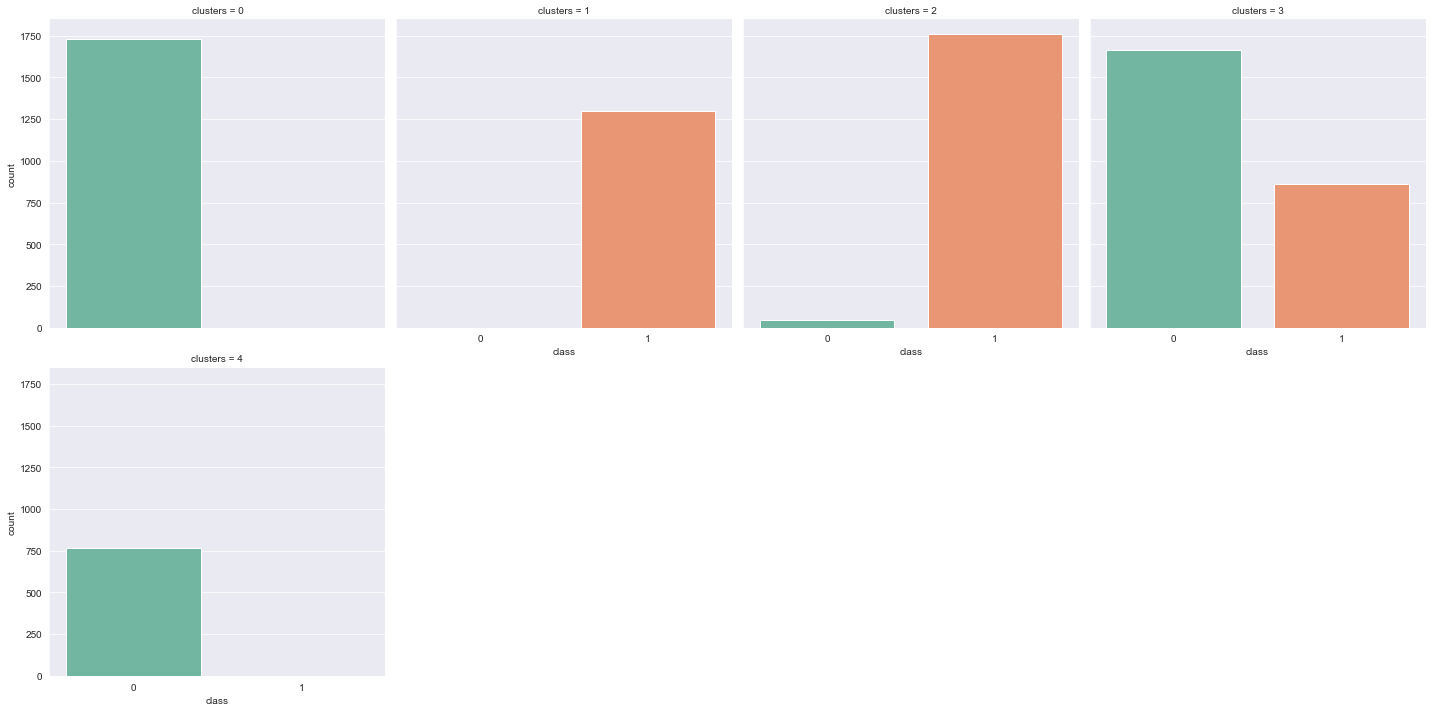

In [41]:
# Preparar el factorplot

#necesitamos un dataframe como hemos visto antes:
data_km= pd.DataFrame()
#en ese dataframe tenemos que tener la prediccion dentro de 'clusters'
data_km['clusters']= y_pred
#y tambien una columna clase con los datos en bruto de y
data_km['class']= y


# Pintar

#el factorplot ya no existe actualizado pero si el catplot
ax= sns.catplot(col='clusters', x= 'class', data= data_km, kind='count',palette='Set2', col_wrap=4)

> Solo 2  de los clusters contienen puntos incorrectos: el 2 y el 3, en los demás no hay predicciones erróneas

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans

In [42]:
# Entrenar PCA para representar

pca= PCA(n_components=2)
pca.fit(X)
X_pca= pca.transform(X)

data_pca= pd.DataFrame(data= X_pca, columns= ['PC1','PC2'])
data_pca['cluster']= y_pred
data_pca.head()

,PC1,PC2,cluster
0,-1.337699,-0.420101,3
1,-1.585662,0.579696,3
2,-1.721603,0.340093,3
3,-1.412213,-0.124730,3
4,-1.001979,-0.528128,4


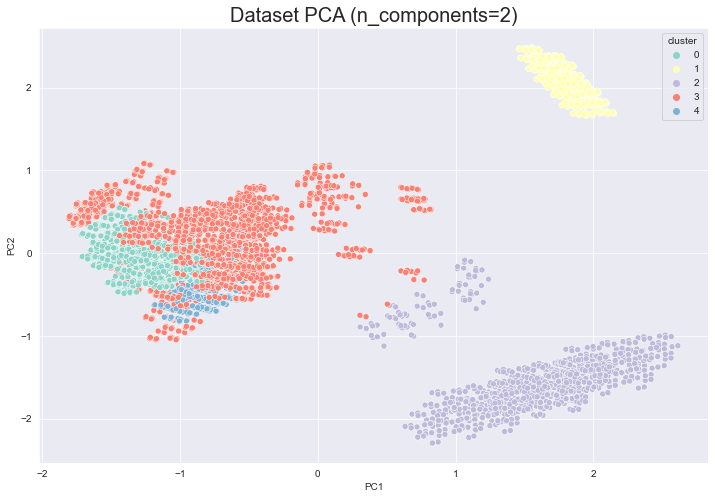

In [43]:
# Representar los clusters como color 

plt.figure(figsize=(12,8))

sns.scatterplot(data= data_pca, x='PC1', y= 'PC2', hue= 'cluster',palette='Set3')

plt.title('Dataset PCA (n_components=2)', fontsize=20)

plt.show()

> Como vemos ha delimitado relativamente bien los clusters . Sin embargo, sabemos de antemano que solo existen 2 por lo que la predicción no es el del todo correcta y el Random Forest seguiría prediciendo mejor las clases. Aunque debemos tener claro que en un problema real no tendríamos esta información previa para un algoritmo de aprendizaje no supervisado.

¿Es bastante parecido no? Tan bueno como el maravilloso Random Forest no es, pero ha conseguido identificar bastante bien los distintos puntos del dataset. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos, el resto de por si nos saca la variable a predecir ya limpia.